In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcVXNlclxEb2N1bWVudHNcR2l0SHViXHByaW1lbnVtYmVyc2FtLmdpdGh1Yi5pb1xwcm9qZWN0cw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\importlib\\_bootstrap.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\importlib\\_bootstrap_external.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\zipimport.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\codecs.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\aliases.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\__init__.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\utf_8.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\cp949.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\abc.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\i

Extreme Point (x, y, z): 10.0 0.5 1.9952623149688795
Extreme Point Type: Saddle


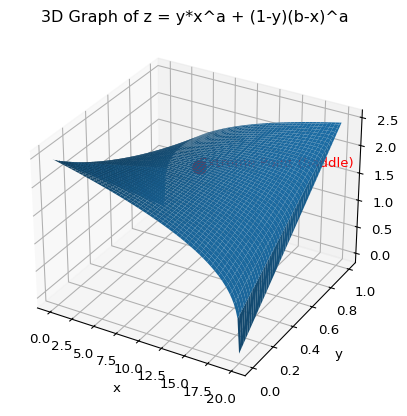

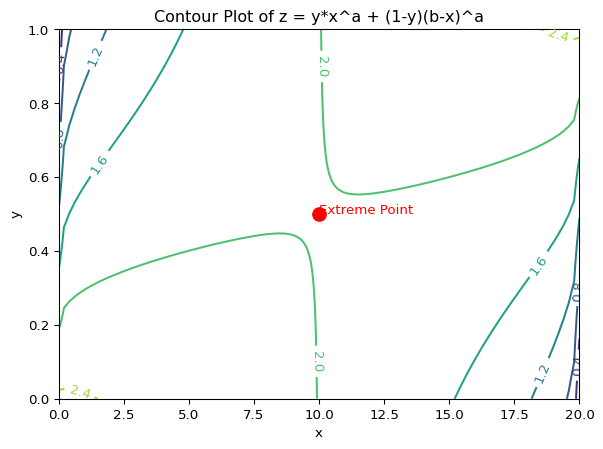

In [2]:
#@title Utilitarian objective function
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

# 함수 정의
def z_function(x, y, a, b):
  return y * (x**a) + (1 - y) * ((b - x)**a)

# x, y 범위 및 매개변수 설정
a = 0.3  # 매개변수 a 값 (0과 1 사이)
b = 20  # 매개변수 b 값

x = np.linspace(0, b, 100)  # x 범위: 0부터 20까지 100개의 점
y = np.linspace(0, 1, 100)  # y 범위: 0부터 1까지 100개의 점
X, Y = np.meshgrid(x, y)  # x, y 좌표 격자 생성


# Z 값 계산
Z = z_function(X, Y, a, b)


def negative_z_function(params):
    x, y = params
    return -z_function(x, y, a, b)  # 최솟값을 찾기 위해 음수 값 반환

# 초기값 설정 (interior 범위 내)
initial_guess = [b / 2, 0.5]

# 경계 조건 설정
bounds = [(0, b), (0, 1)]

# 최적화 실행
result = minimize(negative_z_function, initial_guess, bounds=bounds)

# 결과 추출
extreme_point_x, extreme_point_y = result.x
extreme_point_z = z_function(extreme_point_x, extreme_point_y, a, b)

print("Extreme Point (x, y, z):", extreme_point_x, extreme_point_y, extreme_point_z)

# Calculate Hessian matrix
def hessian_matrix(x, y, a, b):
  """Calculates the Hessian matrix of the z_function."""
  d2z_dx2 = a * (a - 1) * (y * (x**(a - 2)) + (1 - y) * ((b - x)**(a - 2)))
  d2z_dy2 = 0  # Second derivative with respect to y is 0
  d2z_dxdy = a * (x**(a - 1) - (b - x)**(a - 1))
  d2z_dydx = d2z_dxdy  # Mixed partial derivatives are equal

  return [[d2z_dx2, d2z_dxdy], [d2z_dydx, d2z_dy2]]

# Determine the type of extreme point
hessian = hessian_matrix(extreme_point_x, extreme_point_y, a, b)
determinant = np.linalg.det(hessian)

if determinant > 0 and hessian[0][0] > 0:
  extreme_type = "Minimum"
elif determinant > 0 and hessian[0][0] < 0:
  extreme_type = "Maximum"
else:
  extreme_type = "Saddle"

print("Extreme Point Type:", extreme_type)


# 3D 그래프 그리기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('3D Graph of z = y*x^a + (1-y)(b-x)^a')


# global interior extreme point 표시
ax.scatter(extreme_point_x, extreme_point_y, extreme_point_z, color='red', marker='o', s=100)
ax.text(extreme_point_x, extreme_point_y, extreme_point_z, f'Extreme Point ({extreme_type})', color='red')

plt.show()

# Contour Plot 그리기
fig, ax = plt.subplots()
contour = ax.contour(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Contour Plot of z = y*x^a + (1-y)(b-x)^a')
plt.clabel(contour, inline=1, fontsize=10)

# global interior extreme point 표시
ax.scatter(extreme_point_x, extreme_point_y, color='red', marker='o', s=100)
ax.text(extreme_point_x, extreme_point_y, 'Extreme Point', color='red')

plt.show()

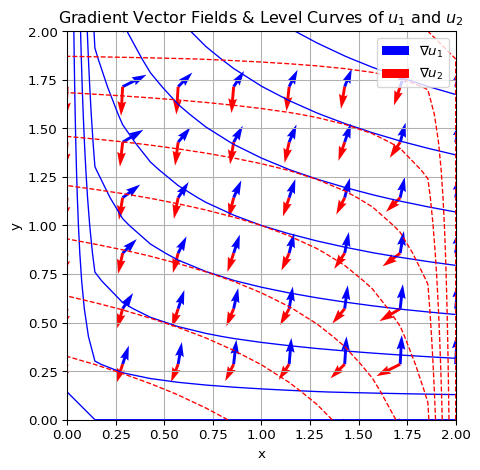

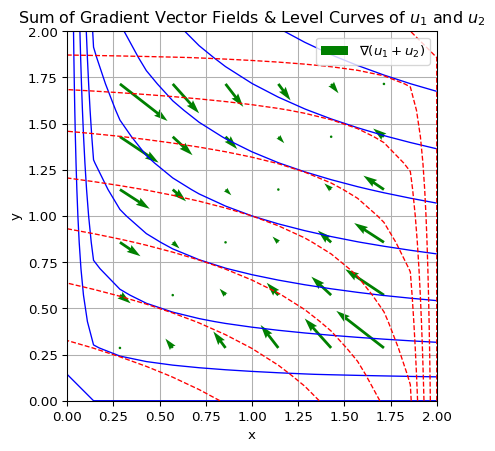

In [3]:
# Define a return to scale
scale = 1 # Constant return to scale, i.e. Homogeneous function of degree 1

# Define parameter a
a = 1/4

# total wealth of x
k_x = 2
# total wealth of y
k_y = 2

import numpy as np
import matplotlib.pyplot as plt

# 경고 메시지 숨기기
np.seterr(invalid='ignore')

def numerical_derivative(f, X, Y, h=1e-5):
    """ Compute numerical partial derivatives using central difference method."""
    dfdx = (f(X + h, Y) - f(X - h, Y)) / (2 * h)  # ∂f/∂x
    dfdy = (f(X, Y + h) - f(X, Y - h)) / (2 * h)  # ∂f/∂y
    return dfdx, dfdy

# Define functions u_1(x,y) = x^a * y^(1-a) and u_2(x,y) = (2-x)(2-y)
def u1(x, y):
    return x**(scale*a) * y**(scale*(1-a))

def u2(x, y):
    return (k_x - x)**(scale*a) * (k_y - y)**(scale*(1-a))

# Define the grid
x = np.linspace(0, k_x, 15)
y = np.linspace(0, k_y, 15)
X, Y = np.meshgrid(x, y)

# Compute the numerical derivatives (vector field components)
U1, V1 = numerical_derivative(u1, X, Y)
U2, V2 = numerical_derivative(u2, X, Y)

# Reduce the density of vectors for better visualization
x_sparse = np.linspace(0, k_x, 8)
y_sparse = np.linspace(0, k_y, 8)
X_sparse, Y_sparse = np.meshgrid(x_sparse, y_sparse)
U1_sparse, V1_sparse = numerical_derivative(u1, X_sparse, Y_sparse)
U2_sparse, V2_sparse = numerical_derivative(u2, X_sparse, Y_sparse)

# Plot the combined vector fields and contour plots
#plt.figure(figsize=(8, 8))

# Contour plots of u_1 and u_2 (level curves only)
contour1 = plt.contour(X, Y, u1(X, Y), colors='blue', linestyles='solid', linewidths=1)
contour2 = plt.contour(X, Y, u2(X, Y), colors='red', linestyles='dashed', linewidths=1)

# Overlay vector fields
plt.quiver(X_sparse, Y_sparse, U1_sparse, V1_sparse, color='b', angles='xy', label='∇$u_1$')
plt.quiver(X_sparse, Y_sparse, U2_sparse, V2_sparse, color='r', angles='xy', label='∇$u_2$')

# Labels and grid
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Vector Fields & Level Curves of $u_1$ and $u_2$')
plt.legend()
plt.grid('scaled')
plt.axis('square')

plt.tight_layout()
# Show the plot
plt.show()

# Compute the sum of gradients
U_sum = U1 + U2
V_sum = V1 + V2

# Reduce the density of vectors for better visualization
U_sum_sparse, V_sum_sparse = numerical_derivative(lambda x, y: u1(x, y) + u2(x, y), X_sparse, Y_sparse)

# Plot the combined vector fields and contour plots
#plt.figure(figsize=(8, 8))

# Contour plots of u_1 and u_2 (level curves only)
contour1 = plt.contour(X, Y, u1(X, Y), colors='blue', linestyles='solid', linewidths=1)
contour2 = plt.contour(X, Y, u2(X, Y), colors='red', linestyles='dashed', linewidths=1)

# Overlay sum of gradient vector fields
plt.quiver(X_sparse, Y_sparse, U_sum_sparse, V_sum_sparse, color='g', angles='xy', label='∇($u_1 + u_2$)')

# Labels and grid
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sum of Gradient Vector Fields & Level Curves of $u_1$ and $u_2$')
plt.legend()

plt.grid('scaled')
plt.axis('square')
# Show the plot
plt.show()

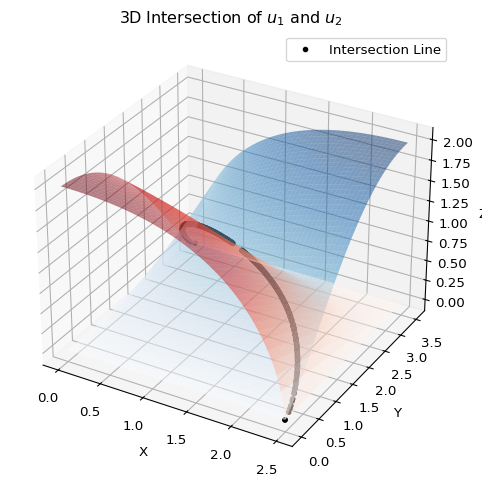

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define constants
kx = (np.pi**3 / 2) ** (1/3)
ky = (2**(1/2)) * ((np.pi**3 / 2) ** (1/3))

# Define the grid
x = np.linspace(0, kx, 1000)
y = np.linspace(0, ky, 1000)
X, Y = np.meshgrid(x, y)

# Define the functions
u1 = 1 - np.cos(X**(1/3) * Y**(2/3))
u2 = 1 - np.cos((kx - X)**(1/3) * (ky - Y)**(2/3))

# Find intersection points where u1 == u2
threshold = 1e-3  # Numerical tolerance for equality
intersection_mask = np.abs(u1 - u2) < threshold
X_intersect = X[intersection_mask]
Y_intersect = Y[intersection_mask]
Z_intersect = u1[intersection_mask]  # u1 and u2 are nearly equal

# Create 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot intersection line
ax.scatter(X_intersect, Y_intersect, Z_intersect, color='black', s=10, label='Intersection Line')

# Surface plots for reference
ax.plot_surface(X, Y, u1, cmap='Blues', alpha=0.5)
ax.plot_surface(X, Y, u2, cmap='Reds', alpha=0.5)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Intersection of $u_1$ and $u_2$')
ax.legend()

plt.show()